# WeatherPy

---

## Starter Code to Generate Random Geographic Coordinates and a List of Cities

In [29]:
# Dependencies and Setup
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import requests
import time
from scipy.stats import linregress

# Impor the OpenWeatherMap API key
from api_keys import weather_api_key

# Import citipy to determine the cities based on latitude and longitude
from citipy import citipy

### Generate the Cities List by Using the `citipy` Library

In [30]:
# Empty list for holding the latitude and longitude combinations
lat_lngs = []

# Empty list for holding the cities names
cities = []

# Range of latitudes and longitudes
lat_range = (-90, 90)
lng_range = (-180, 180)

# Create a set of random lat and lng combinations
lats = np.random.uniform(lat_range[0], lat_range[1], size=1500)
lngs = np.random.uniform(lng_range[0], lng_range[1], size=1500)
lat_lngs = zip(lats, lngs)

# Identify nearest city for each lat, lng combination
for lat_lng in lat_lngs:
    city = citipy.nearest_city(lat_lng[0], lat_lng[1]).city_name
    
    # If the city is unique, then add it to a our cities list
    if city not in cities:
        cities.append(city)

# Print the city count to confirm sufficient count
print(f"Number of cities in the list: {len(cities)}")

Number of cities in the list: 648


---

## Requirement 1: Create Plots to Showcase the Relationship Between Weather Variables and Latitude

### Use the OpenWeatherMap API to retrieve weather data from the cities list generated in the started code

In [31]:
# Set the API base URL
url = f'https://api.openweathermap.org/data/2.5/weather?q={city}&appid={weather_api_key}'

# Define an empty list to fetch the weather data for each city
city_data = []

# Print to logger
print("Beginning Data Retrieval     ")
print("-----------------------------")

# Create counters
record_count = 1
set_count = 1

# Loop through all the cities in our list to fetch weather data
for i, city in enumerate(cities):
        
    # Group cities in sets of 50 for logging purposes
    if (i % 50 == 0 and i >= 50):
        set_count += 1
        record_count = 0

    # Create endpoint URL with each city
    city_url = f'https://api.openweathermap.org/data/2.5/weather?q={city}&appid={weather_api_key}&units=metric'
    
    # Log the url, record, and set numbers
    print("Processing Record %s of Set %s | %s" % (record_count, set_count, city))

    # Add 1 to the record count
    record_count += 1

    # Run an API request for each of the cities
    try:
        # Parse the JSON and retrieve data
        city_weather = requests.get(city_url).json()

        # Parse out latitude, longitude, max temp, humidity, cloudiness, wind speed, country, and date
        city_lat = city_weather['coord']['lat']
        city_lng = city_weather['coord']['lon']
        city_max_temp = city_weather['main']['temp_max']
        city_humidity = city_weather['main']['humidity']
        city_clouds = city_weather['clouds']['all']
        city_wind = city_weather['wind']['speed']
        city_country = city_weather['sys']['country']
        city_date = city_weather['dt']
        
        # Append the City information into city_data list
        city_data.append({"City": city, 
                          "Lat": city_lat, 
                          "Lng": city_lng, 
                          "Max Temp": city_max_temp,
                          "Humidity": city_humidity,
                          "Cloudiness": city_clouds,
                          "Wind Speed": city_wind,
                          "Country": city_country,
                          "Date": city_date})

    # If an error is experienced, skip the city
    except KeyError:
        print("City not found. Skipping...")
        pass
              
# Indicate that Data Loading is complete 
print("-----------------------------")
print("Data Retrieval Complete      ")
print("-----------------------------")

Beginning Data Retrieval     
-----------------------------
Processing Record 1 of Set 1 | hamilton
Processing Record 2 of Set 1 | tromso
Processing Record 3 of Set 1 | badger
Processing Record 4 of Set 1 | adamstown
Processing Record 5 of Set 1 | tobelo
Processing Record 6 of Set 1 | port-aux-francais
Processing Record 7 of Set 1 | daru
Processing Record 8 of Set 1 | manzini
Processing Record 9 of Set 1 | grytviken
Processing Record 10 of Set 1 | gebeit
Processing Record 11 of Set 1 | lebu
Processing Record 12 of Set 1 | san antonio de pale
Processing Record 13 of Set 1 | pacocha
Processing Record 14 of Set 1 | invercargill
Processing Record 15 of Set 1 | taiohae
City not found. Skipping...
Processing Record 16 of Set 1 | port elizabeth
Processing Record 17 of Set 1 | sant'agnello
Processing Record 18 of Set 1 | atafu village
Processing Record 19 of Set 1 | yuzhno-kurilsk
Processing Record 20 of Set 1 | ust-nera
Processing Record 21 of Set 1 | kirakira
Processing Record 22 of Set 1 | 

City not found. Skipping...
Processing Record 40 of Set 4 | el granada
Processing Record 41 of Set 4 | male
Processing Record 42 of Set 4 | vorgashor
Processing Record 43 of Set 4 | bestobe
Processing Record 44 of Set 4 | northam
Processing Record 45 of Set 4 | tazacorte
Processing Record 46 of Set 4 | mont-dore
Processing Record 47 of Set 4 | tarawa
Processing Record 48 of Set 4 | orastie
Processing Record 49 of Set 4 | hastings
Processing Record 0 of Set 5 | salinopolis
Processing Record 1 of Set 5 | santa maria del oro
Processing Record 2 of Set 5 | acapulco de juarez
Processing Record 3 of Set 5 | alotau
City not found. Skipping...
Processing Record 4 of Set 5 | malvan
Processing Record 5 of Set 5 | taft
Processing Record 6 of Set 5 | st. john's
Processing Record 7 of Set 5 | khandyga
Processing Record 8 of Set 5 | benguela
Processing Record 9 of Set 5 | sitia
Processing Record 10 of Set 5 | verkhnevilyuysk
Processing Record 11 of Set 5 | torbat-e jam
Processing Record 12 of Set 5 

Processing Record 29 of Set 8 | selfoss
Processing Record 30 of Set 8 | sao felix do xingu
Processing Record 31 of Set 8 | nemuro
Processing Record 32 of Set 8 | krasnyy chikoy
Processing Record 33 of Set 8 | sarkand
Processing Record 34 of Set 8 | port hueneme
Processing Record 35 of Set 8 | caxito
Processing Record 36 of Set 8 | kurchatov
Processing Record 37 of Set 8 | airuk
Processing Record 38 of Set 8 | cole harbour
Processing Record 39 of Set 8 | nagqu
Processing Record 40 of Set 8 | huntingburg
Processing Record 41 of Set 8 | fuvahmulah
City not found. Skipping...
Processing Record 42 of Set 8 | kamyzyak
Processing Record 43 of Set 8 | maine soroa
Processing Record 44 of Set 8 | maragogi
Processing Record 45 of Set 8 | thinadhoo
Processing Record 46 of Set 8 | redcliff
Processing Record 47 of Set 8 | galesburg
Processing Record 48 of Set 8 | ji'an
Processing Record 49 of Set 8 | vingt cinq
City not found. Skipping...
Processing Record 0 of Set 9 | asind
Processing Record 1 of S

Processing Record 20 of Set 12 | hassi messaoud
Processing Record 21 of Set 12 | guerrero negro
Processing Record 22 of Set 12 | kijang
Processing Record 23 of Set 12 | kristiansund
Processing Record 24 of Set 12 | shofirkon shahri
City not found. Skipping...
Processing Record 25 of Set 12 | cam ranh
Processing Record 26 of Set 12 | kangding
Processing Record 27 of Set 12 | marshfield
Processing Record 28 of Set 12 | hanceville
Processing Record 29 of Set 12 | boende
Processing Record 30 of Set 12 | nurota
Processing Record 31 of Set 12 | richmond
Processing Record 32 of Set 12 | vilhena
Processing Record 33 of Set 12 | coari
Processing Record 34 of Set 12 | rochelle
Processing Record 35 of Set 12 | christchurch
Processing Record 36 of Set 12 | nakhodka
Processing Record 37 of Set 12 | cadale
Processing Record 38 of Set 12 | aldama
Processing Record 39 of Set 12 | gizo
Processing Record 40 of Set 12 | pawni
Processing Record 41 of Set 12 | luocheng
Processing Record 42 of Set 12 | seve

In [32]:
print(city_url)

https://api.openweathermap.org/data/2.5/weather?q=brookings&appid=c38a4a1c0fce2293809a3599529e4458&units=metric


In [33]:
# Convert the cities weather data into a Pandas DataFrame
city_data_df = pd.DataFrame(city_data)

# Show Record Count
city_data_df.count()

City          615
Lat           615
Lng           615
Max Temp      615
Humidity      615
Cloudiness    615
Wind Speed    615
Country       615
Date          615
dtype: int64

In [34]:
# Display sample data
city_data_df.head()

,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
0,hamilton,39.1834,-84.5333,14.89,74,0,4.12,US,1707521885
1,tromso,69.6496,18.9570,-3.99,58,40,6.69,NO,1707522513
2,badger,64.8000,-147.5333,-3.49,77,100,0.00,US,1707522464
3,adamstown,-25.0660,-130.1015,25.29,90,100,10.85,PN,1707522448
4,tobelo,1.7284,128.0095,27.36,80,68,2.54,ID,1707522513


In [43]:
# Export the City_Data into a csv
city_data_df.to_csv("..\output_data\cities.csv", index_label="City_ID")

In [45]:
# Read saved data
city_data_df = pd.read_csv("..\output_data\cities.csv", index_col="City_ID")

# Display sample data
city_data_df.head()

,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
City_ID,,,,,,,,,
0,hamilton,39.1834,-84.5333,14.89,74,0,4.12,US,1707521885
1,tromso,69.6496,18.9570,-3.99,58,40,6.69,NO,1707522513
2,badger,64.8000,-147.5333,-3.49,77,100,0.00,US,1707522464
3,adamstown,-25.0660,-130.1015,25.29,90,100,10.85,PN,1707522448
4,tobelo,1.7284,128.0095,27.36,80,68,2.54,ID,1707522513


### Create the Scatter Plots Requested

#### Latitude Vs. Temperature

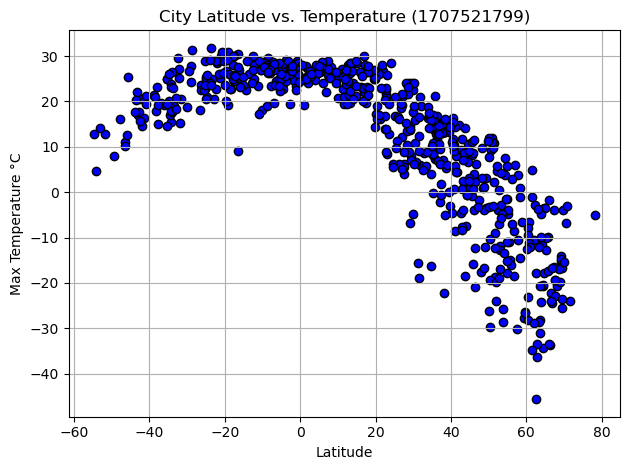

In [48]:
# Build scatter plot for latitude vs. temperature
plt.scatter(city_data_df['Lat'],city_data_df['Max Temp'], marker='o', facecolors='b', edgecolors='k')

# Incorporate the other graph properties
plt.grid()
plt.xlabel("Latitude")
plt.ylabel("Max Temperature °C")
date=city_data_df['Date'].min()
plt.title(f"City Latitude vs. Temperature ({date})")
plt.tight_layout()

# Save the figure
plt.savefig("..\output_data\Fig1.png")

# Show plot
plt.show()

#### Latitude Vs. Humidity

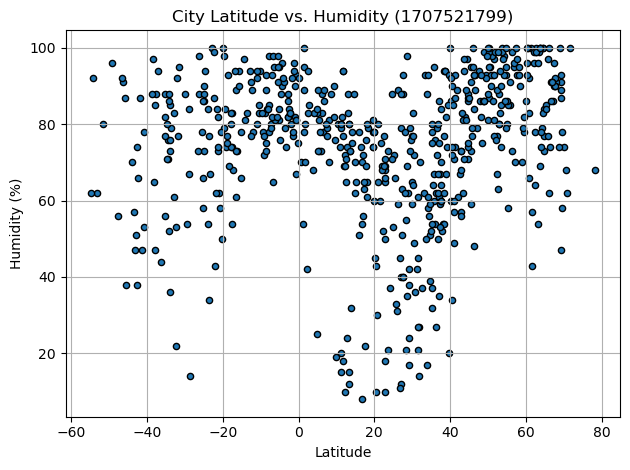

In [49]:
# Build the scatter plots for latitude vs. humidity
city_data_df.plot(kind='scatter', x='Lat', y='Humidity', marker='o', grid=True,\
                  facecolors='b', edgecolors='k', title=f'City Latitude vs. Humidity ({date})')

# Incorporate the other graph properties
plt.xlabel("Latitude")
plt.ylabel("Humidity (%)")
plt.tight_layout()

# Save the figure
plt.savefig("..\output_data\Fig2.png")

# Show plot
plt.show()

#### Latitude Vs. Cloudiness

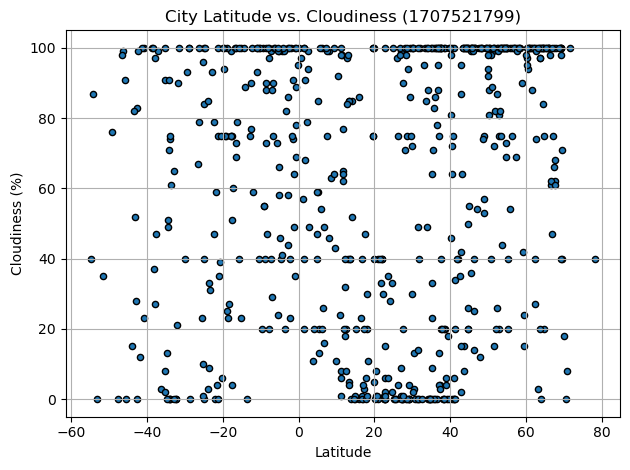

In [50]:
# Build the scatter plots for latitude vs. cloudiness
city_data_df.plot(kind='scatter', x='Lat', y='Cloudiness', marker='o', grid=True,\
                  facecolors='b', edgecolors='k', title=f'City Latitude vs. Cloudiness ({date})')

# Incorporate the other graph properties
plt.xlabel("Latitude")
plt.ylabel("Cloudiness (%)")
plt.tight_layout()

# Save the figure
plt.savefig("..\output_data\Fig3.png")

# Show plot
plt.show()

#### Latitude vs. Wind Speed Plot

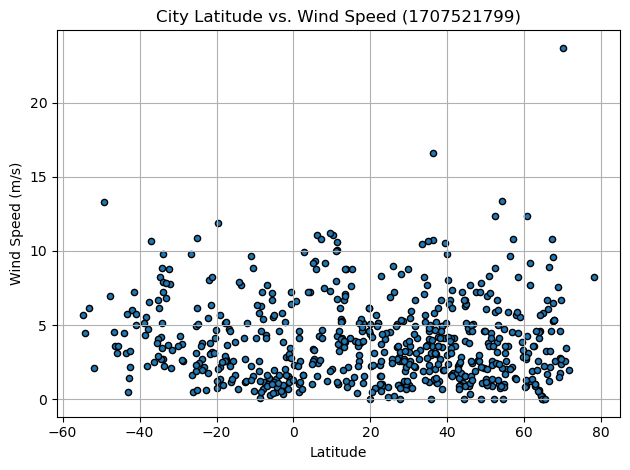

In [51]:
# Build the scatter plots for latitude vs. wind speed
city_data_df.plot(kind='scatter', x='Lat', y='Wind Speed', marker='o', grid=True,\
                  facecolors='b', edgecolors='k', title=f'City Latitude vs. Wind Speed ({date})')

# Incorporate the other graph properties
plt.xlabel("Latitude")
plt.ylabel("Wind Speed (m/s)")
plt.tight_layout()

# Save the figure
plt.savefig("..\output_data\Fig4.png")

# Show plot
plt.show()

---

## Requirement 2: Compute Linear Regression for Each Relationship


In [52]:
# Define a function to create Linear Regression plots
def linear_regress(x, y, eqn_coordinates):
    r = st.pearsonr(x, y)
    print(f"The r-value is: {r[0]}")
    (slope, intercept, rvalue, pvalue, stderr) = linregress(x, y)
    regress_values = x * slope + intercept
    line_eq = f"y ={slope: .2f}x +{intercept: .2f}"
    plt.plot(x, regress_values, "r-")
    plt.annotate(line_eq, eqn_coordinates, fontsize=12, color="red")
    plt.scatter(x, y)
    plt.xlabel(f"{x.name}")
    plt.ylabel(f"{y.name}")

In [53]:
# Create a DataFrame with the Northern Hemisphere data (Latitude >= 0)
northern_hemi_df = city_data_df.loc[city_data_df["Lat"] >= 0]

# Display sample data
northern_hemi_df.head()

,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
City_ID,,,,,,,,,
0,hamilton,39.1834,-84.5333,14.89,74,0,4.12,US,1707521885
1,tromso,69.6496,18.9570,-3.99,58,40,6.69,NO,1707522513
2,badger,64.8000,-147.5333,-3.49,77,100,0.00,US,1707522464
4,tobelo,1.7284,128.0095,27.36,80,68,2.54,ID,1707522513
9,gebeit,21.0667,36.3167,16.20,80,0,0.76,SD,1707522514


In [54]:
# Create a DataFrame with the Southern Hemisphere data (Latitude < 0)
southern_hemi_df = city_data_df.loc[city_data_df["Lat"] < 0]

# Display sample data
southern_hemi_df.head()

,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
City_ID,,,,,,,,,
3,adamstown,-25.0660,-130.1015,25.29,90,100,10.85,PN,1707522448
5,port-aux-francais,-49.3500,70.2167,7.92,96,76,13.33,TF,1707522448
6,daru,-9.0763,143.2092,28.92,72,55,1.91,PG,1707522461
7,manzini,-26.2500,31.5000,23.62,98,100,1.61,SZ,1707522514
8,grytviken,-54.2811,-36.5092,4.67,92,87,4.49,GS,1707522446


###  Temperature vs. Latitude Linear Regression Plot

Linear equation: y = -0.76x + 34.32
The r-value is: -0.8538727911866844


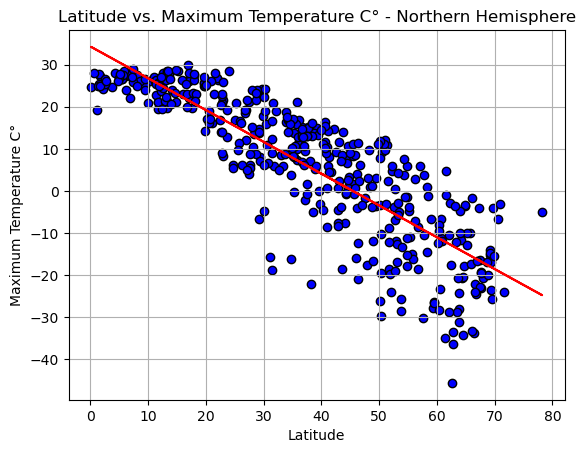

In [76]:
# Linear regression on Northern Hemisphere
plt.scatter(northern_hemi_df['Lat'],northern_hemi_df['Max Temp'], marker='o', facecolors='b', edgecolors='k')


plt.grid()
plt.xlabel("Latitude")
plt.ylabel("Max Temp")
plt.title("Latitude vs. Temperature in Northern Hemisphere")


def lr_funcV2(x,y,name,vbl,hemi):
    (slope,intercept,rvalue,pvalue,stderror)=linregress(x,y)
    reg_values= x*slope + intercept
    plt.plot(x,reg_values,color='r')
    plt.title(f'Latitude vs. {vbl} - {hemi}')
    plt.xlabel('Latitude')
    plt.ylabel(vbl)
    line_eq = f'y = {(round(slope,2))}x + {(round(intercept,2))}'
    print(f'Linear equation: {line_eq}')
    plt.savefig(f"..\output_data\LinearRegresion_{name}.png")
    print(f'The r-value is: {rvalue}')

x = northern_hemi_df['Lat']
y = northern_hemi_df['Max Temp']
name = 'NH_LatVsMaxTemp'
vbl = 'Maximum Temperature C°'
hemi = 'Northern Hemisphere'
lr_funcV2(x,y,name,vbl,hemi)
plt.show()

Linear equation: y = 0.22x + 28.25
The r-value is: 0.6285062555119312


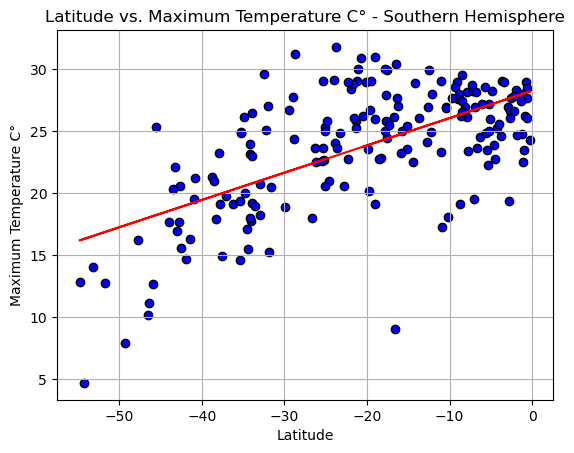

In [77]:
# Linear regression on Southern Hemisphere
plt.scatter(southern_hemi_df['Lat'],southern_hemi_df['Max Temp'], marker='o', facecolors='b', edgecolors='k')


plt.grid()

x = southern_hemi_df['Lat']
y = southern_hemi_df['Max Temp']
name = 'SH_LatVsMaxTemp'
vbl = 'Maximum Temperature C°'
hemi = 'Southern Hemisphere'
lr_funcV2(x,y,name,vbl,hemi)
plt.show()

**Discussion about the linear relationship:** The relationship is strong between the latitude and temperature, in the Northern Hemipshere as the latitude increases the temperature decreases and in the Southern Hemipshere it is the oposite as the latitude increase so does the temperature, so as we approach the equater the temperature increases. 

### Humidity vs. Latitude Linear Regression Plot

Linear equation: y = 0.4x + 57.83
The r-value is: 0.35798361084330327


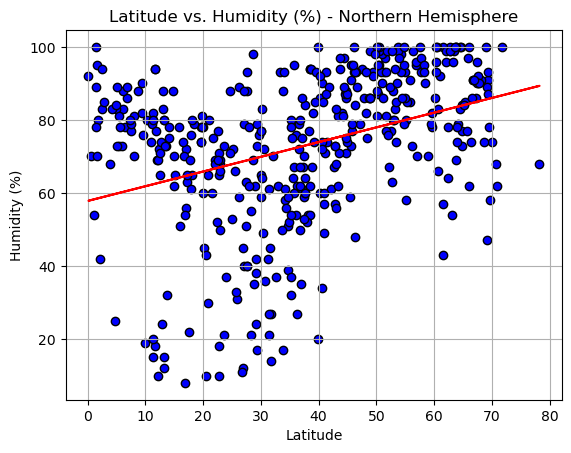

In [74]:
# Northern Hemisphere
plt.scatter(northern_hemi_df['Lat'],northern_hemi_df['Humidity'], marker='o', facecolors='b', edgecolors='k')


plt.grid()


x = northern_hemi_df['Lat']
y = northern_hemi_df['Humidity']
name = 'NH_LatVsHumidity'
vbl = 'Humidity (%)'
hemi = 'Northern Hemisphere'
lr_funcV2(x,y,name,vbl,hemi)
plt.show()

Linear equation: y = 0.39x + 85.99
The r-value is: 0.355960418231418


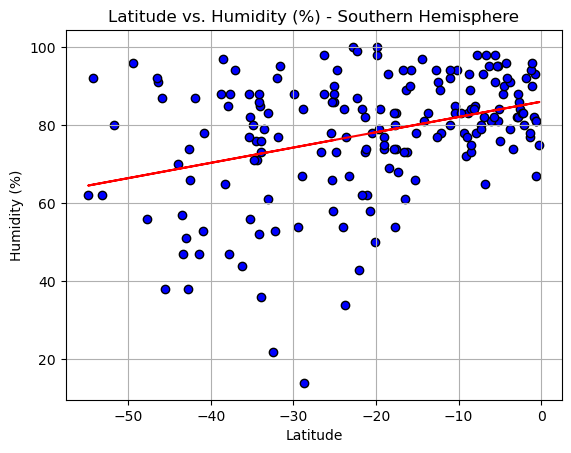

In [75]:
# Southern Hemisphere
plt.scatter(southern_hemi_df['Lat'],southern_hemi_df['Humidity'], marker='o', facecolors='b', edgecolors='k')


plt.grid()


x = southern_hemi_df['Lat']
y = southern_hemi_df['Humidity']
name = 'SH_LatVsHumidity'
vbl = 'Humidity (%)'
hemi = 'Southern Hemisphere'
lr_funcV2(x,y,name,vbl,hemi)
plt.show()

**Discussion about the linear relationship:** The scatter plot is all over the place for each hemisphere meaning that there is very little correlation between humidity and latitude so being close to the equator or far from it does not really determine the humidity levels. 

### Cloudiness vs. Latitude Linear Regression Plot

Linear equation: y = 0.68x + 33.22
The r-value is: 0.32352031708792994


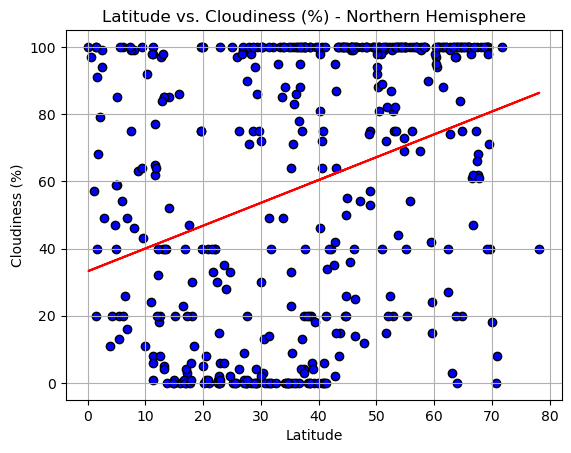

In [78]:
# Northern Hemisphere
plt.scatter(northern_hemi_df['Lat'],northern_hemi_df['Cloudiness'], marker='o', facecolors='b', edgecolors='k')


plt.grid()


x = northern_hemi_df['Lat']
y = northern_hemi_df['Cloudiness']
name = 'NH_LatVsCloudiness'
vbl = 'Cloudiness (%)'
hemi = 'Northern Hemisphere'
lr_funcV2(x,y,name,vbl,hemi)
plt.show()

Linear equation: y = 0.64x + 75.49
The r-value is: 0.2574342027018205


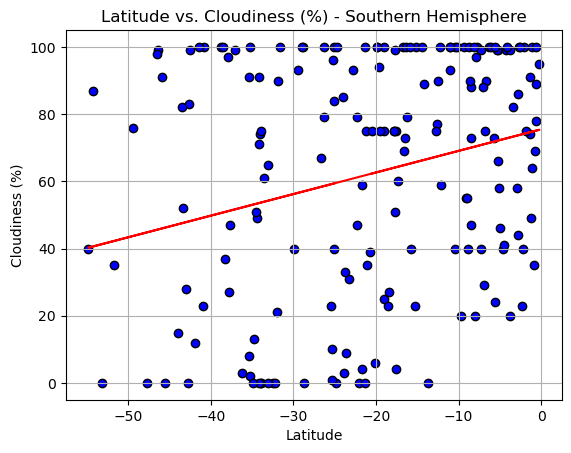

In [79]:
# Southern Hemisphere
plt.scatter(southern_hemi_df['Lat'],southern_hemi_df['Cloudiness'], marker='o', facecolors='b', edgecolors='k')


plt.grid()


x = southern_hemi_df['Lat']
y = southern_hemi_df['Cloudiness']
name = 'SH_LatVsCloudiness'
vbl = 'Cloudiness (%)'
hemi = 'Southern Hemisphere'
lr_funcV2(x,y,name,vbl,hemi)
plt.show()

**Discussion about the linear relationship:** Cloudiness is the same if not more like humidity meaning that there is very little correlation between the latitude and cloudiness. 

### Wind Speed vs. Latitude Linear Regression Plot

Linear equation: y = -0.01x + 4.22
The r-value is: -0.054866768116152646


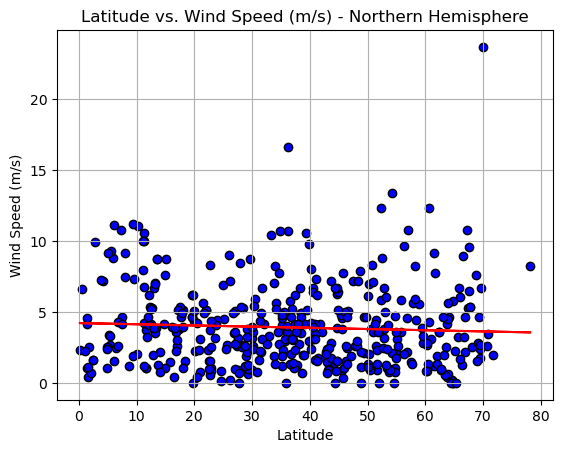

In [81]:
# Northern Hemisphere
plt.scatter(northern_hemi_df['Lat'],northern_hemi_df['Wind Speed'], marker='o', facecolors='b', edgecolors='k')


plt.grid()


x = northern_hemi_df['Lat']
y = northern_hemi_df['Wind Speed']
name = 'NH_LatVsWindSpeed'
vbl = 'Wind Speed (m/s)'
hemi = 'Northern Hemisphere'
lr_funcV2(x,y,name,vbl,hemi)
plt.show()

Linear equation: y = -0.06x + 2.64
The r-value is: -0.3113551848480149


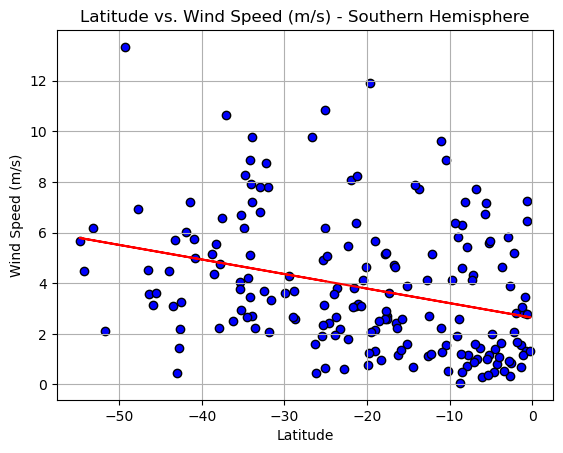

In [82]:
# Southern Hemisphere
plt.scatter(southern_hemi_df['Lat'],southern_hemi_df['Wind Speed'], marker='o', facecolors='b', edgecolors='k')


plt.grid()


x = southern_hemi_df['Lat']
y = southern_hemi_df['Wind Speed']
name = 'SH_LatVsWindSpeed'
vbl = 'Wind Speed (m/s)'
hemi = 'Southern Hemisphere'
lr_funcV2(x,y,name,vbl,hemi)
plt.show()

**Discussion about the linear relationship:** In the Northern Hempishere there is some sort of a correlation so as the latitude increase wind speeds decrease but in the Souther Hemipshere there is less of a correlation but still some as the latitude increases the wind speed also decreases